<a href="https://colab.research.google.com/github/PatelJay3878/Iris-Dataset-Classification./blob/main/d3inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 8.3MB/s 


In [4]:
import efficientnet.keras as efn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D

In [5]:
import os

path = '/content/drive/MyDrive/Data'
train_dir = os.path.join('/content/drive/MyDrive/Data/train')
val_dir = os.path.join('/content/drive/MyDrive/Data/val')
test_dir = os.path.join('/content/drive/MyDrive/Data/test')


In [6]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( val_dir, batch_size = 5, class_mode = 'categorical', target_size = (224, 224))


Found 510 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [7]:
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

16809984/16804768 [==============================] - 0s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="softmax")(x)
model_final = Model(inputs = base_model.input, outputs= predictions)

In [10]:
from tensorflow.keras.optimizers import RMSprop
model_final.compile(RMSprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 5, epochs = 20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 95s 21s/step - loss: 1.3174 - accuracy: 0.7500 - val_loss: 1.2665 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 53s 11s/step - loss: 1.1948 - accuracy: 0.7750 - val_loss: 1.3508 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 37s 8s/step - loss: 1.1706 - accuracy: 0.7861 - val_loss: 1.1902 - val_accuracy: 0.7792
Epoch 4/20
5/5 [==============================] - 40s 8s/step - loss: 1.2113 - accuracy: 0.7775 - val_loss: 1.2925 - val_accuracy: 0.7500
Epoch 5/20
5/5 [==============================] - 30s 7s/step - loss: 1.0782 - accuracy: 0.8056 - val_loss: 1.2300 - val_accuracy: 0.7583
Epoch 6/20
5/5 [==============================] - 27s 6s/step - loss: 1.1203 - accuracy: 0.7850 - val_loss: 1.1009 - val_accuracy: 0.7917
Epoch 7/20
5/5 [==============================] - 28s 6s/step - loss: 0.9682 - accuracy: 0.8250 - val_loss: 1.1603 - val_accuracy: 0.7833
Epoch 8/20
5/5 [================

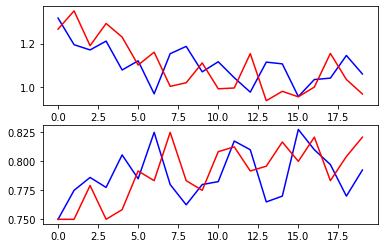

In [14]:
#Plotting the training and validation loss and accuracy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f,ax=plt.subplots(2,1) 

#Loss
ax[0].plot(model_final.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_final.history.history['val_loss'],color='r',label='Validation Loss')

#Accuracy
ax[1].plot(model_final.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_final.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [15]:
model_final.save("jay.h5")

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_final.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Glaucoma_004.png to Glaucoma_004.png
Glaucoma_004.png
[[1.0000000e+00 0.0000000e+00 4.0586996e-32 0.0000000e+00]]
